In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [87]:
data=pd.read_csv("Data/finalTrain.csv")

In [88]:
df=data.copy()

In [89]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
#to split the dependent and target features
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [6]:
X.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian


In [7]:
y

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
45579,32
45580,36
45581,16
45582,26


In [8]:
numerical_cols=X.select_dtypes(exclude='object').columns
categorical_cols=X.select_dtypes(include='object').columns

In [9]:
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries'],
      dtype='object')

In [10]:
categorical_cols

Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [11]:
# Define the custom ranking for each ordinal variable- order in the ascending

#ordinal encoding

#traffic_density={'Low':1,'Medium':2,'High':3,'Jam':4}

Road_traffic_density_cat=['Low','Medium','High','Jam']

In [ ]:
#one hot encoding
#Weather_conditions
#City

#to drop
#ID', 'Delivery_person_ID,'Type_of_order''Delivery_person_Ratings',


Using Haversine formula: It takes the latitude and longitude of two points and converts the angles to radians to perform the necessary calculations. We use this formula because the dataset doesn’t provide the distance between the restaurant and the delivery location. There are only latitude and longitude. So, let’s calculate it and then create a distance column in the dataset.

In [12]:

# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  

In [75]:
# Calculate the distance between each pair of points
def distance_calcs(df):

    df['distance'] = np.nan

    for i in range(len(df)):
        df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                            df.loc[i, 'Restaurant_longitude'], 
                                            df.loc[i, 'Delivery_location_latitude'], 
                                            df.loc[i, 'Delivery_location_longitude'])

    return df                                        

In [90]:
distance_calcs(df)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,...,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,1.489846
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,...,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,11.007735
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,...,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,4.657195
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,...,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,6.232393


In [15]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'distance'],
      dtype='object')

In [16]:
import re

In [17]:
def time_format(time):

    # define regular expression to match the expected format (HH:MM)
    time_pattern = re.compile(r'^\d{1,2}:\d{2}$')

    # check and update values in the 'Time_Orderd' column
    for idx, time_val in df[time].items():
        if isinstance(time_val, str) and not bool(time_pattern.match(time_val)):
            try:
                hours, minutes = divmod(float(time_val) * 60, 60)
                df.loc[idx, time] = f'{int(hours):02d}:{int(minutes):02d}'
            except ValueError:
                pass

In [18]:
# Define a function to apply the necessary data type conversions
def convert_to_float(df):
    df['Time_Orderd_Hour']=df['Time_Orderd'].str.split(':').str[0]
    df['Time_Orderd_min']=df['Time_Orderd'].str.split(':').str[1]
    df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
    df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':').str[1]
    df['Time_Orderd_Hour'] = df['Time_Orderd_Hour'].astype(float)
    df['Time_Orderd_min'] = df['Time_Orderd_min'].astype(float)
    df['Time_Order_picked_Hour'] = df['Time_Order_picked_Hour'].astype(float)
    df['Time_Order_picked_min'] = df['Time_Order_picked_min'].astype(float)
    return df

In [17]:
def festival_conv(df):

    df['Festival'] = df['Festival'].map({'No': 0, 'Yes': 1})
    return df

In [18]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [19]:
#Create a pipeline to perform the various steps in data processing and scaling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
# To create numerical pipeline
'''
num_pipeline=Pipeline(
    steps=[
        #('drop1',ColumnTransformer(transformers=[('drop','drop',['ID','Delivery_person_ID','Type_of_order','Delivery_person_Ratings'])])),
        ('drop',['ID','Delivery_person_ID','Type_of_order','Delivery_person_Ratings']),
        ('imputer', SimpleImputer(strategy='median')),

        ('distance', FunctionTransformer(distance_calcs), ['Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude']),

       
        #('drop2',ColumnTransformer(transformers=[('drop','drop',['Restaurant_latitude',
       #'Restaurant_longitude', 'Delivery_location_latitude',
       #'Delivery_location_longitude'])])), 
        ('drop',['Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude']),
         
        ('scaler',StandardScaler())
        ]
        )

# To create categorical pipeline     

cat_pipeline=Pipeline(
    steps=[
        #('drop1',ColumnTransformer(transformers=[('drop','drop',['Order_Date','Type_of_order'])])),
        ('drop',['Order_Date','Type_of_order']),

        ('imputer',SimpleImputer(strategy='most_frequent')),

        ('time_order', FunctionTransformer(time_format), ['Time_Orderd']),

        ('time_pick', FunctionTransformer(time_format), ['Time_Order_picked']),

        ('conversion_time',FunctionTransformer(convert_to_float)),

        ('conv_festival',FunctionTransformer(festival_conv),['Festival']),
      
        ('onehot', OneHotEncoder(categories=['Weather_conditions','City','Type_of_vehicle'])),

        ('ordinal Encoder', OrdinalEncoder(categories=[Road_traffic_density_cat])),

        #('drop2',ColumnTransformer(transformers=[('drop','drop',['Time_Orderd','Time_Order_picked','Weather_conditions','City','Festival','Type_of_vehicle'])])),

        ('drop',['Time_Orderd','Time_Order_picked','Weather_conditions','City','Festival','Type_of_vehicle']),

        ('scaler',StandardScaler())
    ]
)

#To apply the pipeline in the columns using transformer function

preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('Cat_pipeline',cat_pipeline,categorical_cols)]
)

'''

In [21]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'distance'],
      dtype='object')

In [20]:
def drop_features(df,features):
    df=df.drop(columns=[features],axis=1,inplace=True)
    return df


In [91]:
drop_features(df,'ID')
drop_features(df,'Delivery_person_ID')
drop_features(df,'Restaurant_latitude')
drop_features(df,'Restaurant_longitude')
drop_features(df,'Delivery_location_latitude')
drop_features(df,'Delivery_location_longitude')
drop_features(df,'Order_Date')
drop_features(df,'Time_Orderd')
drop_features(df,'Time_Order_picked')




In [23]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'distance'],
      dtype='object')

In [25]:
from matplotlib.pyplot import figure

C:\Users\DELL\AppData\Local\Temp\ipykernel_10600\3882197229.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr('spearman'))
C:\Users\DELL\AppData\Local\Temp\ipykernel_10600\3882197229.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)


<Axes: >

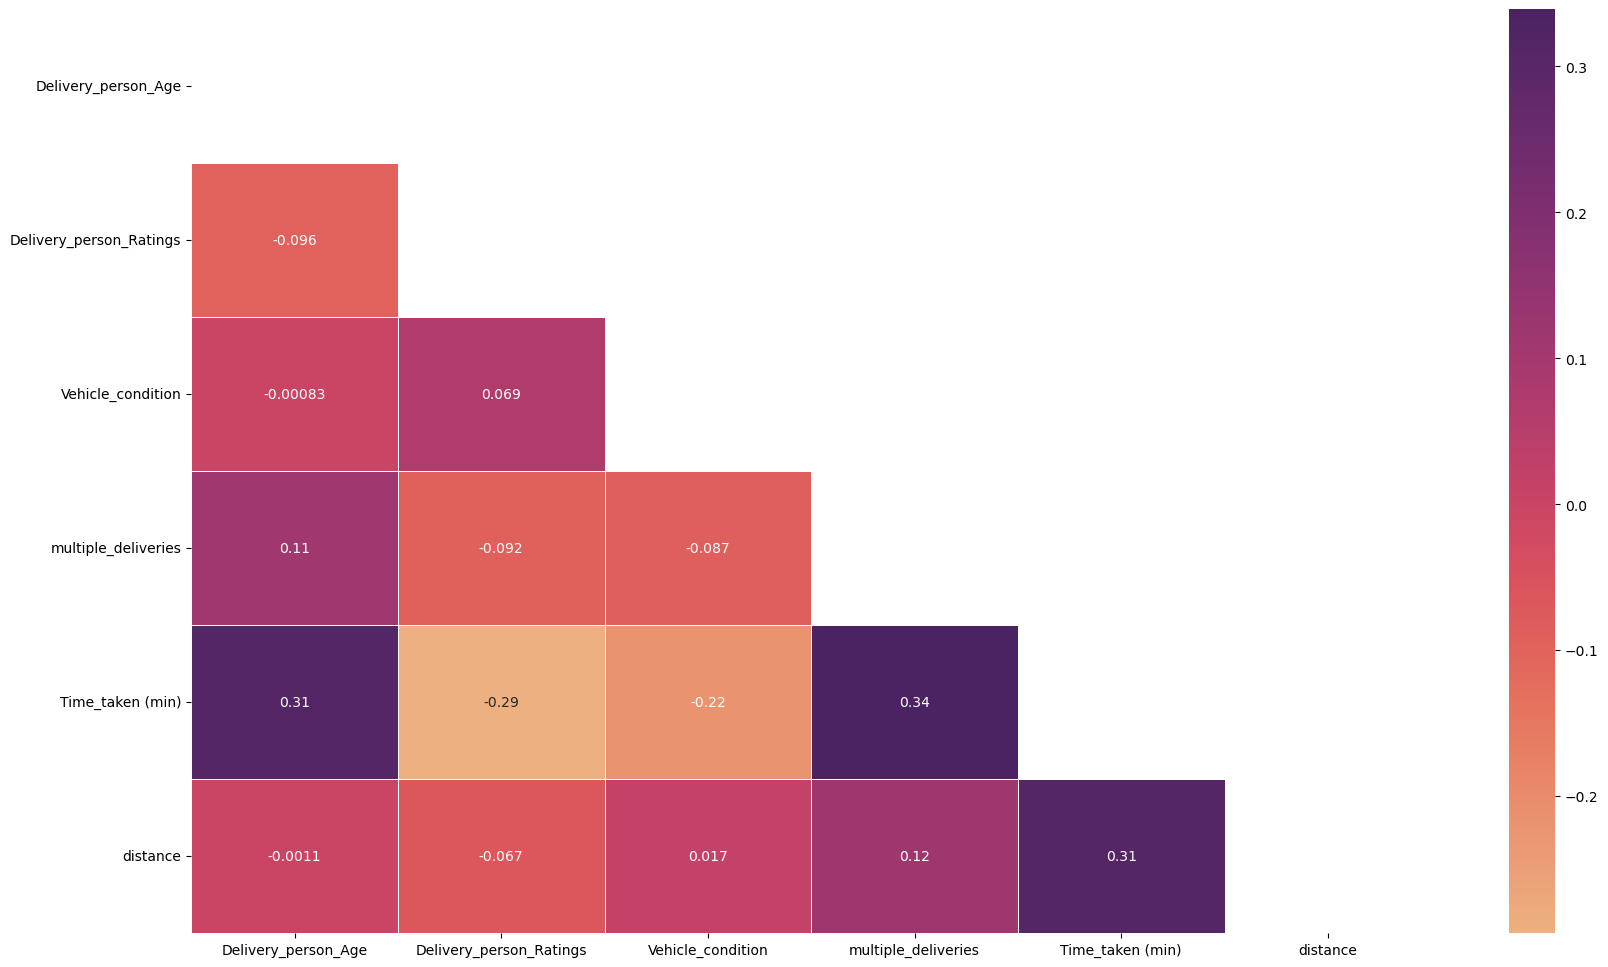

In [26]:
figure(figsize=(20, 12))
mask = np.zeros_like(df.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

In [29]:
categorical_cols

Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [27]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder

In [30]:
class encoding(BaseEstimator,TransformerMixin):
    def __init__(self,columns=['Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']):
        self.columns=columns
    
    def fit(self,df):
        return self
    
    def transform(self,df):
        oe=OrdinalEncoder()
        df[self.columns]=oe.fit_transform(df[self.columns])
        return df


In [34]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [35]:
df["Vehicle_condition"].unique()

array([2, 1, 0, 3], dtype=int64)

In [37]:
df['multiple_deliveries'].value_counts()

1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

In [ ]:
we no need to scale the naturally bounded numerical values

In [51]:
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries'],
      dtype='object')

In [61]:
class feature_scaling(BaseEstimator,TransformerMixin):
    def __init__(self,columns=['Delivery_person_Age','Delivery_person_Ratings','distance']):
        self.columns=columns

    def fit(self,df):
        return self

    def transform(self,df):
        sc=StandardScaler()
        df[self.columns]=sc.fit_transform(df[self.columns])
        return df    

In [40]:
df.isnull().sum()

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Weather_conditions          616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken (min)              0
distance                      0
dtype: int64

In [86]:
class fill_NA_transformer(BaseEstimator,TransformerMixin):

    def __init__(self,columns=['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density',
                               'multiple_deliveries','Festival','City']):
        self.columns = columns
        self.mean_values = {}
        self.mode_values = {}

    def fit(self, df):
        for col in self.columns:
            if df[col].dtype == 'object':
                self.mode_values[col] = df[col].mode()[0]
            else: 
                self.mean_values[col] = df[col].mean()
        return self

    def transform(self, df):
        for col in self.columns:
            if col in self.mean_values:
                df[col].fillna(self.mean_values[col], inplace=True)
            if col in self.mode_values:
                df[col].fillna(self.mode_values[col], inplace=True)
        return df    
    




In [92]:
pipe=Pipeline(
    steps=[
        ('fill_NA',fill_NA_transformer()),
        ('encoding',encoding()),
        ('feature_scaling',feature_scaling())
    ]
)

In [59]:
pipe

Pipeline(steps=[('encoding', encoding()),
                ('feature_scaling', feature_scaling())])

In [52]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'distance'],
      dtype='object')

In [93]:
pipe.fit_transform(df)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,1.129501,-1.323855,1.0,1.0,2,3.0,2.0,3.0,0.0,0.0,46,-0.080959
1,-1.504150,0.202119,3.0,0.0,1,2.0,2.0,1.0,0.0,0.0,23,-0.084631
2,-1.152997,0.202119,2.0,3.0,1,1.0,3.0,1.0,0.0,0.0,21,-0.077770
3,0.778347,-1.018660,2.0,2.0,0,0.0,2.0,0.0,0.0,0.0,20,-0.087642
4,-0.977420,0.202119,1.0,1.0,1,3.0,3.0,1.0,0.0,0.0,41,-0.072670
...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0.076040,0.507314,5.0,0.0,1,2.0,2.0,0.0,0.0,0.0,32,-0.088952
45580,-1.504150,-0.103076,5.0,1.0,0,0.0,2.0,1.0,0.0,0.0,36,-0.080298
45581,0.076040,0.812509,0.0,2.0,1,1.0,3.0,0.0,0.0,0.0,16,-0.086072
45582,-1.679727,0.202119,0.0,0.0,0,3.0,2.0,1.0,0.0,0.0,26,-0.084640


In [84]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,1.129501,-1.295853,1.0,1.0,2,3.0,2.0,3.0,0.0,0.0,46,-0.080959
1,-1.504150,0.197844,3.0,0.0,1,2.0,2.0,1.0,0.0,0.0,23,-0.084631
2,-1.152997,0.197844,2.0,3.0,1,1.0,3.0,1.0,0.0,0.0,21,-0.077770
3,0.778347,-0.997114,2.0,2.0,0,0.0,2.0,0.0,0.0,0.0,20,-0.087642
4,-0.977420,0.197844,1.0,1.0,1,3.0,3.0,1.0,0.0,0.0,41,-0.072670


In [94]:
df.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken (min)           0
distance                   0
dtype: int64

In [95]:
#to split the dependent and target features
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [96]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [97]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
21963,-0.977420,1.117704,4.0,3.0,1,3.0,2.0,1.0,0.0,0.0,16
10410,0.953924,-1.018660,2.0,2.0,0,2.0,2.0,1.0,0.0,0.0,27
38301,1.480654,-1.629050,2.0,3.0,0,0.0,2.0,0.0,0.0,0.0,36
44997,-0.450690,0.812509,5.0,3.0,1,3.0,3.0,1.0,0.0,0.0,22
16861,-1.679727,0.202119,0.0,1.0,0,0.0,2.0,0.0,1.0,0.0,42


In [98]:
y_train.head()

,distance
21963,-0.086072
10410,-0.081806
38301,-0.080630
44997,-0.071860
16861,-0.077557


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error